# New section

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import re

In [ ]:
file = pd.read_csv("data.csv")

In [ ]:
file.head()

,Issue key,Issue id,Status,Created,Updated,Custom field (Implementation Planned End Date),Custom field (Implementation Planned Start Date),Assignee,Custom field (Closed Date),Creator,Custom field (Defect Type),Custom field (Environment),Custom field (Feature Link),Custom field (How I Fixed (Resolution Provided)),Custom field (How It Happened? (Root Cause)),Summary,Custom field (Test Type)
0,INSBFOS-1641,404745,New,02/Oct/23 9:21 AM,02/Oct/23 9:22 AM,NaN,NaN,C005119,NaN,C006808,Program Error,NaN,INSBFOS-861,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-7321][INSBFOS-1641]#Defect 3: Jenkin jo...,NaN
1,INSBFOS-1640,404607,Assigned,29/Sep/23 5:18 PM,29/Sep/23 7:27 PM,NaN,NaN,C005015,NaN,C003602,Environment Error,UAT,INSBFOS-1627,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-14635/INSBFOS-1640] #Defect 2: Integrat...,UAT
2,INSBFOS-1639,404601,READY FOR TEST,29/Sep/23 4:59 PM,29/Sep/23 5:51 PM,NaN,NaN,C006808,NaN,C006808,UI / Cosmetic,NaN,INSBFOS-861,Cosmetic issues resolved by displaying sub cla...,Cosmetic issues - System displaying sub class ...,[QUEST-7321][INSBFOS-1639]#Defect 3: Two sub c...,NaN
3,INSBFOS-1638,403784,Closed,27/Sep/23 4:04 PM,29/Sep/23 5:12 PM,NaN,NaN,C003602,29/Sep/23 5:12 PM,C003602,Environment Error,UAT,INSBFOS-1627,Due to server Environment variable is not upda...,The issue is fixed after force starting the se...,[QUEST-14635/INSBFOS-1638] #Defect 1: Unable t...,UAT
4,INSBFOS-1637,403643,Review In progress,27/Sep/23 2:16 PM,29/Sep/23 5:58 PM,NaN,NaN,C006808,NaN,C006808,Clarification,NaN,INSBFOS-861,"Its a clarification, no fix given.","Its a clarification, no fix given.",[QUEST-7321][INSBFOS-1637]#Defect 2: Expiry da...,NaN


In [ ]:
stats = ['Assigned', 'Closed', 'New', 'READY FOR TEST', 'Rejected', 'Review In Progress']
filter = file[file['Status'].isin(stats)]
count = filter['Status'].value_counts()

for status, count in count.items():
    print(f"Number of '{status}' occurrences: {count}")

Number of 'Closed' occurrences: 223
Number of 'New' occurrences: 18
Number of 'Rejected' occurrences: 7
Number of 'READY FOR TEST' occurrences: 6
Number of 'Assigned' occurrences: 2


Check missing value

In [ ]:
for column in file.columns:
    missing_count = file[column].isnull().sum()
    print(f"Column '{column}' has {missing_count} missing value(s)")

Column 'Issue key' has 0 missing value(s)
Column 'Issue id' has 0 missing value(s)
Column 'Status' has 0 missing value(s)
Column 'Created' has 0 missing value(s)
Column 'Updated' has 0 missing value(s)
Column 'Custom field (Implementation Planned End Date)' has 267 missing value(s)
Column 'Custom field (Implementation Planned Start Date)' has 267 missing value(s)
Column 'Assignee' has 0 missing value(s)
Column 'Custom field (Closed Date)' has 43 missing value(s)
Column 'Creator' has 0 missing value(s)
Column 'Custom field (Defect Type)' has 9 missing value(s)
Column 'Custom field (Environment)' has 36 missing value(s)
Column 'Custom field (Feature Link)' has 42 missing value(s)
Column 'Custom field (How I Fixed (Resolution Provided))' has 25 missing value(s)
Column 'Custom field (How It Happened? (Root Cause))' has 29 missing value(s)
Column 'Summary' has 0 missing value(s)
Column 'Custom field (Test Type)' has 68 missing value(s)


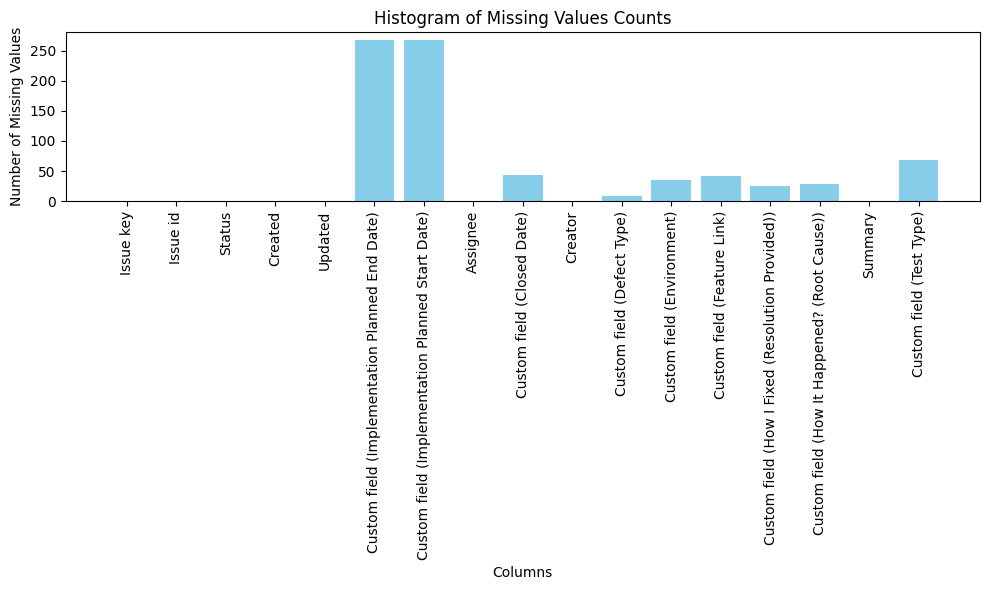

In [ ]:
missing_counts = file.isnull().sum()

# Plot a histogram of missing values counts
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values Counts')
plt.tight_layout()

plt.show()

Drop missing column where data is all NA

In [ ]:
df = file.drop('Custom field (Environment)', axis=1)
df.head(5)

,Issue key,Issue id,Status,Created,Updated,Custom field (Implementation Planned End Date),Custom field (Implementation Planned Start Date),Assignee,Custom field (Closed Date),Creator,Custom field (Defect Type),Custom field (Feature Link),Custom field (How I Fixed (Resolution Provided)),Custom field (How It Happened? (Root Cause)),Summary,Custom field (Test Type)
0,INSBFOS-1641,404745,New,02/Oct/23 9:21 AM,02/Oct/23 9:22 AM,NaN,NaN,C005119,NaN,C006808,Program Error,INSBFOS-861,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-7321][INSBFOS-1641]#Defect 3: Jenkin jo...,NaN
1,INSBFOS-1640,404607,Assigned,29/Sep/23 5:18 PM,29/Sep/23 7:27 PM,NaN,NaN,C005015,NaN,C003602,Environment Error,INSBFOS-1627,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-14635/INSBFOS-1640] #Defect 2: Integrat...,UAT
2,INSBFOS-1639,404601,READY FOR TEST,29/Sep/23 4:59 PM,29/Sep/23 5:51 PM,NaN,NaN,C006808,NaN,C006808,UI / Cosmetic,INSBFOS-861,Cosmetic issues resolved by displaying sub cla...,Cosmetic issues - System displaying sub class ...,[QUEST-7321][INSBFOS-1639]#Defect 3: Two sub c...,NaN
3,INSBFOS-1638,403784,Closed,27/Sep/23 4:04 PM,29/Sep/23 5:12 PM,NaN,NaN,C003602,29/Sep/23 5:12 PM,C003602,Environment Error,INSBFOS-1627,Due to server Environment variable is not upda...,The issue is fixed after force starting the se...,[QUEST-14635/INSBFOS-1638] #Defect 1: Unable t...,UAT
4,INSBFOS-1637,403643,Review In progress,27/Sep/23 2:16 PM,29/Sep/23 5:58 PM,NaN,NaN,C006808,NaN,C006808,Clarification,INSBFOS-861,"Its a clarification, no fix given.","Its a clarification, no fix given.",[QUEST-7321][INSBFOS-1637]#Defect 2: Expiry da...,NaN


In [ ]:
# fill in the NA values with TBD in all column
for col in df.columns:
  df[col].fillna("TBD", inplace = True)

# check if its any missing value
print(df.isnull().sum())

# df.to_csv("new.csv")


Issue key                                           0
Issue id                                            0
Status                                              0
Created                                             0
Updated                                             0
Custom field (Implementation Planned End Date)      0
Custom field (Implementation Planned Start Date)    0
Assignee                                            0
Custom field (Closed Date)                          0
Creator                                             0
Custom field (Defect Type)                          0
Custom field (Feature Link)                         0
Custom field (How I Fixed (Resolution Provided))    0
Custom field (How It Happened? (Root Cause))        0
Summary                                             0
Custom field (Test Type)                            0
dtype: int64


Rename column name and drop unrelated column

In [ ]:
# drop Created, Updated, Assignee, Closed Date,
# Custom field (How It Happened? ( Root Cause)), Custom field (How I Fixed (Resolution Provided))
# Feel free to drop unnecessary columns
dropCol = [
    'Created', 'Updated', 'Assignee', 'Custom field (Closed Date)', 'Custom field (Implementation Planned End Date)', 'Custom field (Implementation Planned Start Date)',
    'Custom field (How It Happened? (Root Cause))', 'Custom field (How I Fixed (Resolution Provided))'
]

df.drop(dropCol, axis=1, inplace=True)

df.head(5)

,Issue key,Issue id,Status,Creator,Custom field (Defect Type),Custom field (Feature Link),Summary,Custom field (Test Type)
0,INSBFOS-1641,404745,New,C006808,Program Error,INSBFOS-861,[QUEST-7321][INSBFOS-1641]#Defect 3: Jenkin jo...,TBD
1,INSBFOS-1640,404607,Assigned,C003602,Environment Error,INSBFOS-1627,[QUEST-14635/INSBFOS-1640] #Defect 2: Integrat...,UAT
2,INSBFOS-1639,404601,READY FOR TEST,C006808,UI / Cosmetic,INSBFOS-861,[QUEST-7321][INSBFOS-1639]#Defect 3: Two sub c...,TBD
3,INSBFOS-1638,403784,Closed,C003602,Environment Error,INSBFOS-1627,[QUEST-14635/INSBFOS-1638] #Defect 1: Unable t...,UAT
4,INSBFOS-1637,403643,Review In progress,C006808,Clarification,INSBFOS-861,[QUEST-7321][INSBFOS-1637]#Defect 2: Expiry da...,TBD


In [ ]:
# Rename Column name
newCol ={
    'Custom field (Test Type)' : 'Test Type',
    'Custom field (Feature Link)' : 'Feature Type',
    'Custom field (Defect Type)' : 'Defect Type'
}

df.rename(columns=newCol, inplace=True)
df.head(5)

,Issue key,Issue id,Status,Creator,Defect Type,Feature Type,Summary,Test Type
0,INSBFOS-1641,404745,New,C006808,Program Error,INSBFOS-861,[QUEST-7321][INSBFOS-1641]#Defect 3: Jenkin jo...,TBD
1,INSBFOS-1640,404607,Assigned,C003602,Environment Error,INSBFOS-1627,[QUEST-14635/INSBFOS-1640] #Defect 2: Integrat...,UAT
2,INSBFOS-1639,404601,READY FOR TEST,C006808,UI / Cosmetic,INSBFOS-861,[QUEST-7321][INSBFOS-1639]#Defect 3: Two sub c...,TBD
3,INSBFOS-1638,403784,Closed,C003602,Environment Error,INSBFOS-1627,[QUEST-14635/INSBFOS-1638] #Defect 1: Unable t...,UAT
4,INSBFOS-1637,403643,Review In progress,C006808,Clarification,INSBFOS-861,[QUEST-7321][INSBFOS-1637]#Defect 2: Expiry da...,TBD


In [ ]:
df.to_csv("new.csv")

In [ ]:
# Define a regular expression pattern to capture text within square brackets
pattern = r'\[(.*?)\]'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('new.csv')

# Create a list to store the modified Summary column
modified_summary = []

# Iterate through the rows to modify the "Summary" column and add a new column
for index, row in df.iterrows():
    summary_text = row['Summary']

    # Find all matches of the pattern in the summary text
    matches = re.findall(pattern, summary_text)
    # If there are Quest Numbers, use the first one, else use 'TBD'
    if matches:
        parts = matches[0].split('/')
        if parts and parts[0].startswith('Q'):
            # Remove text after '|' character, if it exists
            quest = parts[0].split('|')[0]
            modified_summary.append(quest)
        else:
            modified_summary.append('TBD')
    else:
        modified_summary.append('TBD')

# Add the modified summary as a new column
df['Modified Summary'] = modified_summary

# Define the name of the new CSV file
new_csv_file = 'modified_new.csv'

# Save the DataFrame to a new CSV file
df.to_csv('modified_new.csv', index=False, encoding='utf-8')

print(f"Modified data saved to {new_csv_file}")


Modified data saved to modified_new.csv
